In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
avatardf = pd.get_dummies(df["Avatar"])

In [9]:
df = pd.concat([df, avatardf], axis=1)

In [11]:
df = df.drop("Avatar", axis=1)

In [35]:
zips = [x.split(" ")[-1].split("-")[0] for x in df["Address"]]

In [38]:
df["zipCode"] = pd.to_numeric(zips)

In [41]:
df = df.drop("Address", axis=1)

In [42]:
df

,Email,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,AliceBlue,AntiqueWhite,Aqua,Aquamarine,...,Thistle,Tomato,Turquoise,Violet,Wheat,White,WhiteSmoke,Yellow,YellowGreen,zipCode
0,mstephenson@fernandez.com,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,...,0,0,0,1,0,0,0,0,0,82180
1,hduke@hotmail.com,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6566
2,pallen@yahoo.com,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99414
3,riverarebecca@gmail.com,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22070
4,mstephens@davidson-herman.com,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,33.237660,13.566160,36.417985,3.746573,573.847438,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75292
496,katrina56@gmail.com,34.702529,11.695736,37.190268,3.576526,529.049004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19320
497,dale88@hotmail.com,32.646777,11.499409,38.332576,4.958264,551.620145,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56128
498,cwilson@hotmail.com,33.322501,12.391423,36.840086,2.336485,456.469510,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5000


# Emails

In [46]:
emails = df["Email"].apply(lambda x: x.split("@")[-1])

In [49]:
emailsDF = pd.get_dummies(emails)

In [50]:
df = pd.concat([df, emailsDF], axis=1)

In [51]:
df = df.drop("Email", axis=1)

In [52]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,AliceBlue,AntiqueWhite,Aqua,Aquamarine,Azure,...,white.com,wiley.com,williams.com,williamson-boyd.org,wilson-horne.com,wilson.com,wright.com,yahoo.com,yoder.org,zimmerman-villegas.com
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,34.702529,11.695736,37.190268,3.576526,529.049004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,32.646777,11.499409,38.332576,4.958264,551.620145,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,33.322501,12.391423,36.840086,2.336485,456.469510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'AliceBlue',
       'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure',
       ...
       'white.com', 'wiley.com', 'williams.com', 'williamson-boyd.org',
       'wilson-horne.com', 'wilson.com', 'wright.com', 'yahoo.com',
       'yoder.org', 'zimmerman-villegas.com'],
      dtype='object', length=388)

In [67]:
visual_df = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent']]

In [69]:
visual_df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

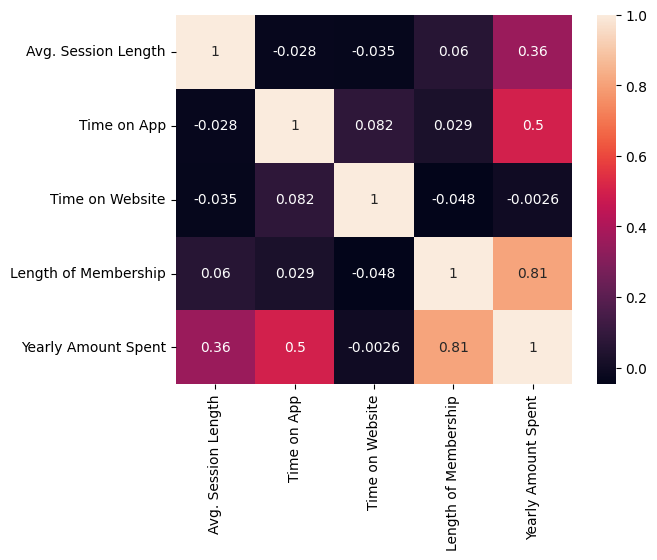

In [74]:
sns.heatmap(visual_df.corr(), annot=True)

In [75]:
visual_df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

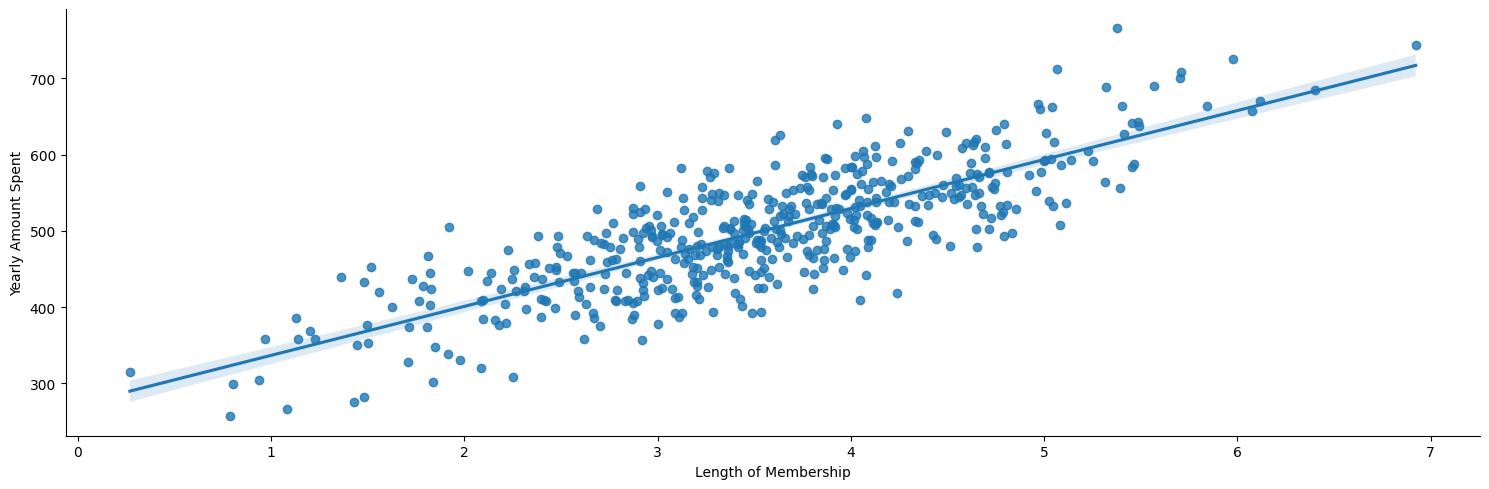

In [77]:
sns.lmplot(x = "Length of Membership", y=  "Yearly Amount Spent", data = visual_df, aspect=3)

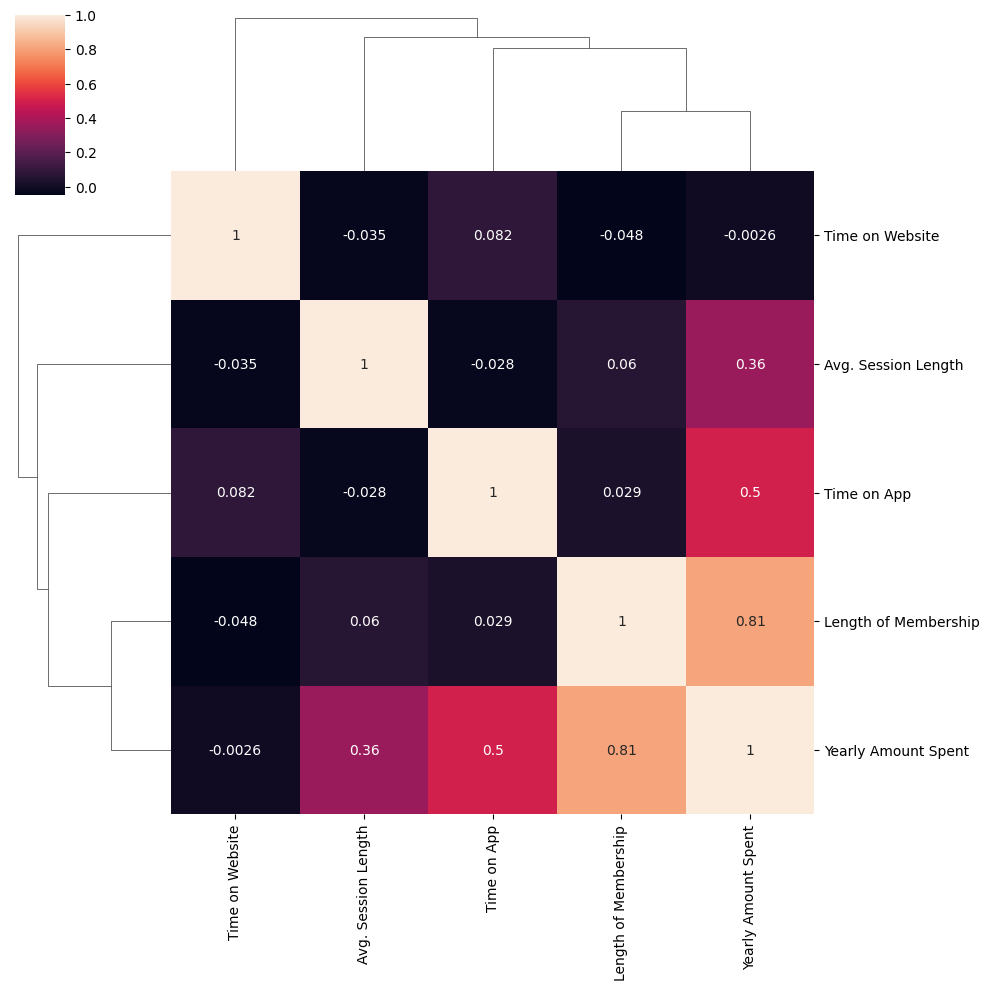

In [79]:
sns.clustermap(visual_df.corr(), annot = True)

In [53]:
target = "Yearly Amount Spent"

In [55]:
X = df.drop(target, axis=1)
y = df[target]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
linearModel = LinearRegression()

In [60]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [64]:
print(linearModel.intercept_)

-1052.5292735076468


In [81]:
predictions = linearModel.predict(X_test)

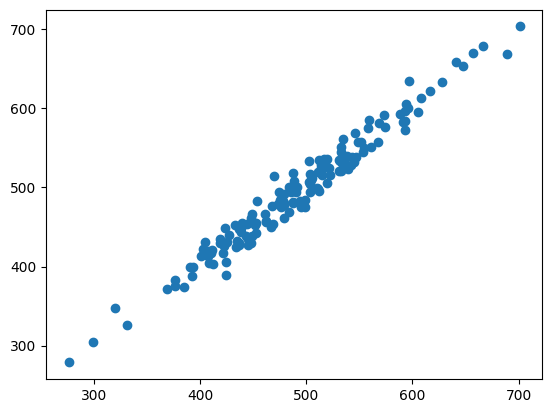

In [84]:
plt.scatter(y_test, predictions)

## Metrics

In [85]:
metrics.mean_squared_error(y_test, predictions)

189.87789024779252

In [86]:
metrics.mean_absolute_error(y_test, predictions)

11.28344542123868

In [87]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

13.779618653932065

In [88]:
df[target]

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64